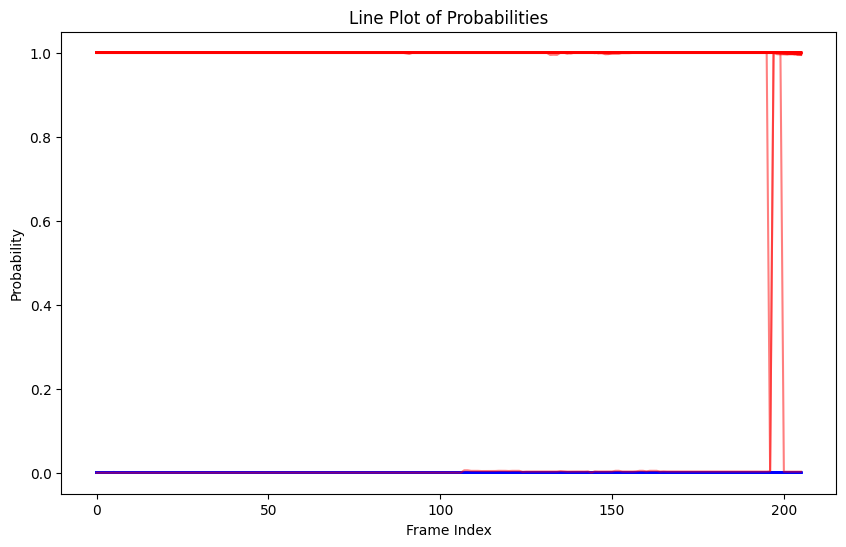

In [1]:
import ast
import matplotlib.pyplot as plt
import pandas as pd

csv_path = '/home/lgeng/BAKU/baku/exp_local/eval/2024.07.08_supervised_eval/deterministic/120340_hidden_dim_256/probs.csv'
data = pd.read_csv(csv_path)
# Convert the 'Probs' column from string representation of lists to actual lists
data['Probs'] = data['Probs'].apply(ast.literal_eval)

# Create a line plot
plt.figure(figsize=(10, 6))

# Plot each row in the 'Probs' column
for idx, row in data.iterrows():
    # if row['Labels'] == 0:
        color = 'blue' if row['Labels'] == 0 else 'red'
        plt.plot(row['Probs'], color=color, alpha=0.5, label='{}'.format("success" if row['Labels'] == 1 else "failure"))

plt.xlabel('Frame Index')
plt.ylabel('Probability')
# plt.legend(prop={'size': 5})
plt.title('Line Plot of Probabilities')
plt.show()
